# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Meir 4270
# student 2: Shmuel lahchakov 4451
# student 3: Aviv Elbaz 1896

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

PATH_TO_TRAIN = 'titanic_train.csv'
PATH_TO_TEST = 'titanic_test.csv'


In [3]:
# Load the titanic_train into a DataFrame
train_df = pd.read_csv(PATH_TO_TRAIN)

# Load the titanic_test into a DataFrame
test_df = pd.read_csv(PATH_TO_TEST)

In [4]:
# Display the first few rows of the train set
print(train_df.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


In [5]:
# Display the first few rows of the test set
print(test_df.head())

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


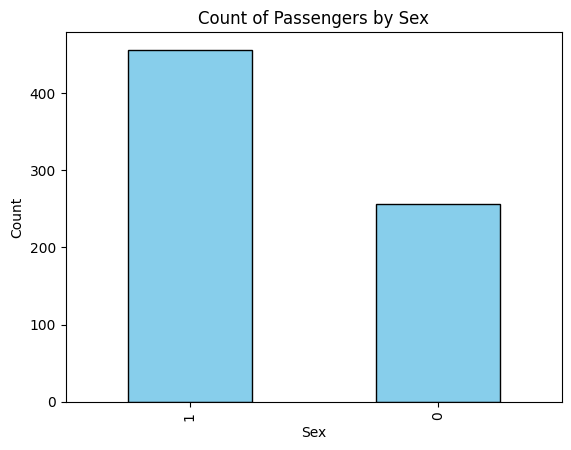

In [6]:
# Bar plot for 'Sex'
train_df['Sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Sex              0         1
Survived                    
0         0.146172  0.853828
1         0.686833  0.313167


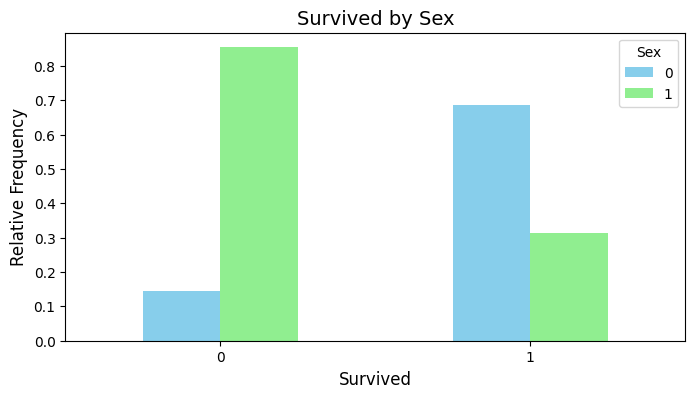

In [7]:
# Survived by sex - Cross Tabulation
ct_sexsur = pd.crosstab(train_df['Survived'], train_df['Sex'])
ct_sexsur_nml = pd.crosstab(train_df['Survived'], train_df['Sex'], normalize='index')
print(ct_sexsur_nml)

# Survived by sex - Bar plots
ct_sexsur_nml.plot(kind='bar', figsize=(8, 4), color=['skyblue', 'lightgreen'])
plt.title('Survived by Sex', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sex', fontsize=10)
plt.show()


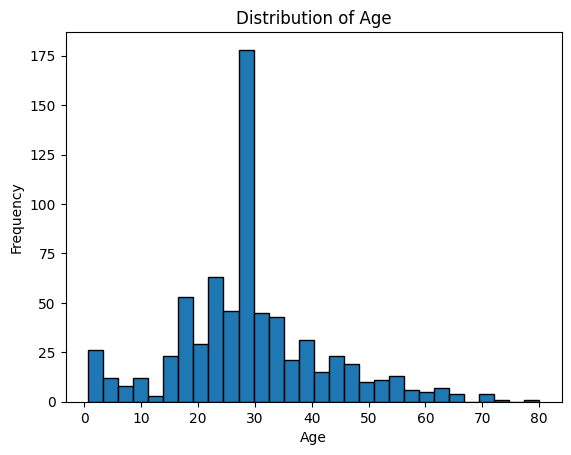

In [8]:
# Histogram for 'Age'
train_df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Descriptive statistics for train_df
stats = train_df.describe()
print(stats)

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

In [10]:
# Info for train_df
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
None


In [11]:
# Shape for train_df
print(train_df.shape)

(712, 8)


########צריך לעשות מפת חום של הקורולציה שיראה יפה########

In [12]:
# Correlation matrix
correlation_matrix = train_df.corr()

# Display the correlation matrix
print(correlation_matrix)

            Pclass       Sex       Age     SibSp     Parch      Fare  \
Pclass    1.000000  0.126986 -0.319927  0.093572  0.048225 -0.543722   
Sex       0.126986  1.000000  0.089108 -0.079976 -0.242467 -0.183650   
Age      -0.319927  0.089108  1.000000 -0.270404 -0.202725  0.071787   
SibSp     0.093572 -0.079976 -0.270404  1.000000  0.415491  0.136861   
Parch     0.048225 -0.242467 -0.202725  0.415491  1.000000  0.151631   
Fare     -0.543722 -0.183650  0.071787  0.136861  0.151631  1.000000   
Embarked  0.040708 -0.124908  0.031524 -0.049109 -0.072698  0.078197   
Survived -0.324024 -0.550699 -0.072729 -0.031052  0.074699  0.264345   

          Embarked  Survived  
Pclass    0.040708 -0.324024  
Sex      -0.124908 -0.550699  
Age       0.031524 -0.072729  
SibSp    -0.049109 -0.031052  
Parch    -0.072698  0.074699  
Fare      0.078197  0.264345  
Embarked  1.000000  0.099162  
Survived  0.099162  1.000000  


## Part 3 - Experiments
You could add as many code cells as needed

In [13]:
# Extracting the target variable
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

################################## Add another feature
################################## For each feature, Run one time with scaling, and one time without scaling, and compare results
# Aviv Adds Binning
# Aviv Adds K-Fold Validation

In [20]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Define models
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_tree = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run grid_search_(KNN&TREE) with all features and without and get the best result

In [16]:
scorer = make_scorer(f1_score)

# Grid Search for KNN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring=scorer)
grid_search_knn.fit(X_train_scaled, y_train)

# Grid Search for Decision Tree
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring=scorer)
grid_search_tree.fit(X_train_scaled, y_train)

# Best results
best_knn = grid_search_knn.best_estimator_
best_tree = grid_search_tree.best_estimator_

print("Best KNN params:", grid_search_knn.best_params_)
print("Best Decision Tree params:", grid_search_tree.best_params_)

c:\Program Files\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best KNN params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Decision Tree params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


c:\Program Files\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [17]:
# Predictions on test set
knn_preds = best_knn.predict(X_test_scaled)
tree_preds = best_tree.predict(X_test_scaled)

# Evaluation
knn_f1 = f1_score(y_test, knn_preds)
tree_f1 = f1_score(y_test, tree_preds)

print(f"KNN F1 Score: {knn_f1}")
print(f"Decision Tree F1 Score: {tree_f1}")

# Summary table
results_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree'],
    'Best Params': [grid_search_knn.best_params_, grid_search_tree.best_params_],
    'F1 Score': [knn_f1, tree_f1]
})

print(results_df)

# Retrain best model on full training data
best_model = best_knn if knn_f1 > tree_f1 else best_tree
best_model.fit(X_train_scaled, y_train)


KNN F1 Score: 0.7741935483870968
Decision Tree F1 Score: 0.7368421052631579
           Model                                        Best Params  F1 Score
0            KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  0.774194
1  Decision Tree  {'max_depth': 3, 'min_samples_leaf': 4, 'min_s...  0.736842


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## Part 5 - Apply on test and show model performance estimation

In [18]:
# Predictions on test set
final_predictions = best_model.predict(X_test_scaled)

# Show first 5 predictions
print("First 5 predictions on test set:", final_predictions[:5])
print("Score ", knn_f1 if knn_f1 > tree_f1 else tree_f1)


First 5 predictions on test set: [0 0 0 1 1]
Score  0.7741935483870968


In [19]:
print("Summary of results:")
print(results_df)


Summary of results:
           Model                                        Best Params  F1 Score
0            KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...  0.774194
1  Decision Tree  {'max_depth': 3, 'min_samples_leaf': 4, 'min_s...  0.736842
